# Projet ml-in-the-clouds

## Imports

In [2]:
!pip install pycaret

     |████████████████████████████████| 486 kB 14.6 MB/s eta 0:00:01
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
     |████████████████████████████████| 194 kB 36.6 MB/s eta 0:00:01
     |████████████████████████████████| 36.4 MB 9.8 MB/s eta 0:00:011
     |████████████████████████████████| 258 kB 42.4 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 99.8 MB/s eta 0:00:01
     |████████████████████████████████| 12.3 MB 34.0 MB/s eta 0:00:01
     |████████████████████████████████| 16.4 MB 67 kB/s /s eta 0:00:01
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
     |████████████████████████████████| 133 kB 81.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 15.8 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 675 kB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 739 kB/s  eta 0:00:01
     |████████████████████████████████| 21.8

In [1]:
import pandas as pd
from pycaret.classification import *

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


import re
from collections import Counter
import random as r

ModuleNotFoundError: No module named 'seaborn'

In [3]:
df = pd.read_csv("emotions_train.csv")

## Introduction

`Projet Visant à prédire l'émotion de l'utilisateur lors de la rédaction d'un message sur les réseaux sociaux`

## Data Exploration

In [4]:
df.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i was so stubborn and that it took you getting...,joy
freq,2,7029


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


<AxesSubplot: >

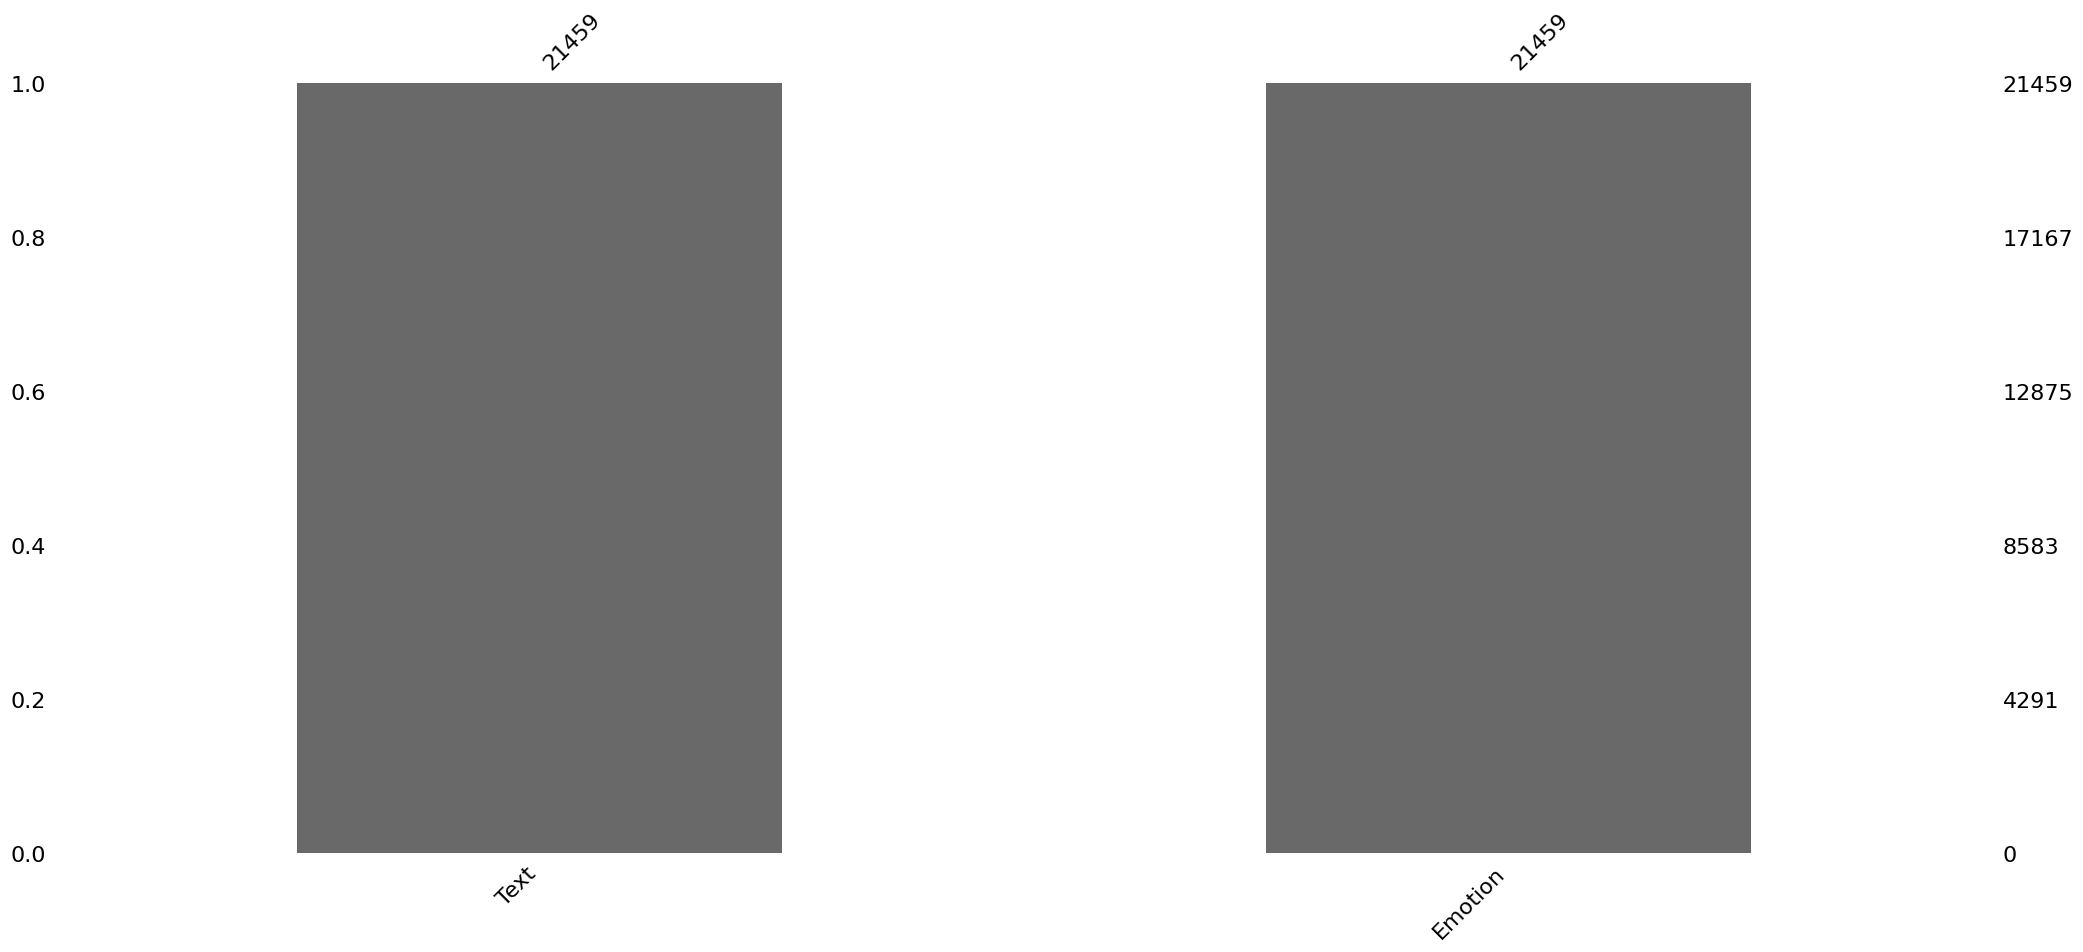

In [20]:
msno.bar(df, sort='ascending')

In [12]:
df.Emotion.value_counts(normalize=True)

joy         0.327555
sadness     0.291952
anger       0.139475
fear        0.123585
love        0.076471
surprise    0.040962
Name: Emotion, dtype: float64

## Data Cleaning

## Words exploration using Count

In [25]:
df.Text

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [107]:
def extract_location_ml(location):
    stopwords = set(['I', 'DIDNT', 'AM','YOU', 'IM', 'THE', 'FROM', 'SO', 'GO', 'BUT', 'WAS', 'AT', 'HER', 'NOT', 'OF',\
        'TO', 'IN', 'THAT', 'WASN', 'ON', 'AND', 'MY', 'GET', 'BEEN', 'FOR', 'ME', 'A', 'IT', 'AN', 'WITH', 'TOO', 'AS', \
            'DO', 'IS', 'M', 'THEN', 'BY'])

    filtered_words = [word.upper() for word in re.findall(r'\b[A-Za-z]+\b', location) if word.upper() not in stopwords]
    word_counts = Counter(filtered_words)
    most_common_word = word_counts.most_common(10)
    if most_common_word:
        return most_common_word[0]
df["Test_Counters"] = df['Text'].apply(extract_location_ml)

# Test_Counters = df.Text.value_counts().reset_index().rename(columns={'count': 'compteur'})
# Test_Counters.head(16)
df["Test_Counters"]
temp_list = list(df["Test_Counters"])
r.shuffle(temp_list)
temp_list

[('ENJOY', 1),
 ('FEEL', 1),
 ('SPENT', 1),
 ('SINKING', 1),
 ('FEELING', 1),
 ('DID', 1),
 ('ONE', 2),
 ('FEEL', 1),
 ('DON', 1),
 ('REALLY', 2),
 ('WOULD', 1),
 ('FEEL', 1),
 ('SOMEONE', 2),
 ('PRAY', 1),
 ('FEEL', 1),
 ('OUT', 2),
 ('THEM', 2),
 ('THINKING', 1),
 ('HIS', 1),
 ('FEELING', 1),
 ('DONT', 1),
 ('ID', 1),
 ('FEEL', 1),
 ('THEM', 2),
 ('DON', 1),
 ('FRIEND', 1),
 ('COME', 1),
 ('WOULD', 1),
 ('FEEL', 1),
 ('FEEL', 1),
 ('FEEL', 1),
 ('HATE', 1),
 ('BE', 2),
 ('FEEL', 1),
 ('OFTEN', 2),
 ('FEEL', 1),
 ('HAVE', 1),
 ('FUN', 2),
 ('FEEL', 1),
 ('SINGAPORE', 2),
 ('FEEL', 1),
 ('FEEL', 1),
 ('LIKE', 2),
 ('FEELING', 1),
 ('HATE', 1),
 ('FEEL', 1),
 ('FEELING', 1),
 ('FEEL', 1),
 ('HE', 1),
 ('EVELYN', 1),
 ('HAD', 1),
 ('DECIDED', 1),
 ('FEEL', 1),
 ('ALSO', 2),
 ('OR', 3),
 ('DEFINITELY', 1),
 ('LET', 1),
 ('ASKED', 1),
 ('SHE', 1),
 ('STILL', 1),
 ('TRYING', 1),
 ('LOVE', 1),
 ('WHEN', 1),
 ('FEEL', 1),
 ('GLORIA', 1),
 ('REMEMBER', 1),
 ('SKIPPING', 1),
 ('FEELING', 1),
 (

In [99]:
df[df.Text.apply(lambda x: x.lower().find("feel"))!=-1]

,Text,Emotion,Test_Counters
0,i didnt feel humiliated,sadness,"[(FEEL, 1)]"
1,i can go from feeling so hopeless to so damned...,sadness,"[(CAN, 1)]"
2,im grabbing a minute to post i feel greedy wrong,anger,"[(GRABBING, 1)]"
3,i am ever feeling nostalgic about the fireplac...,love,"[(EVER, 1)]"
4,i am feeling grouchy,anger,"[(FEELING, 1)]"
...,...,...,...
21201,"Far from experiencing simple gratitude , such ...",fear,"[(FAR, 1)]"
21202,She was still feeling a little anxious when sh...,fear,"[(SHE, 4)]"
21232,"Feeling thoroughly disquieted , she left her r...",fear,"[(FEELING, 1)]"
21272,"I do n't very often feel frightened , but then...",fear,"[(N, 2)]"


In [89]:
df.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [93]:
common_words_by_emotions_df = []
for emotion in df.Emotion.unique():
    df["Test_Counters"] = df['Text'][df.Emotion == emotion].apply(extract_location_ml)
    # Test_Counters = df.Text.value_counts().reset_index().rename(columns={'count': 'compteur'})
    # Test_Counters.head(16)
    print(df["Test_Counters"])


0                             [(FEEL, 1), (HUMILIATED, 1)]
1        [(CAN, 1), (FEELING, 1), (HOPELESS, 1), (DAMNE...
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
21454                                                  NaN
21455                                                  NaN
21456                                                  NaN
21457                                                  NaN
21458                                                  NaN
Name: Test_Counters, Length: 21459, dtype: object
0                                                      NaN
1                                                      NaN
2        [(GRABBING, 1), (MINUTE, 1), (POST, 1), (FEEL,...
3                                                      NaN
4                             [(FEELING, 1), (GROUCHY, 1)]
      

## Discovering Pycaret

In [5]:
# import pycaret classification and init setup

s = setup(df, target = 'Emotion', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(21459, 2)"
5,Transformed data shape,"(21459, 2)"
6,Transformed train set shape,"(15021, 2)"
7,Transformed test set shape,"(6438, 2)"
8,Categorical features,1
9,Preprocess,True


Once the setup has been successfully executed it shows the information grid containing experiment level information.

Session id: A pseudo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions.

Target type: Binary, Multiclass, or Regression. The Target type is automatically detected.

Label Encoding: When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type.

Original data shape: Shape of the original data prior to any transformations.

Transformed train set shape : Shape of transformed train set

Transformed test set shape : Shape of transformed test set

Numeric features : The number of features considered as numerical.

Categorical features : The number of features considered as categorical.

In [6]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [7]:
exp.setup(df, target = 'Emotion', session_id = 124)

,Description,Value
0,Session id,124
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(21459, 2)"
5,Transformed data shape,"(21459, 2)"
6,Transformed train set shape,"(15021, 2)"
7,Transformed test set shape,"(6438, 2)"
8,Categorical features,1
9,Preprocess,True


# Motherfucking way too long to execute

In [12]:
# best = compare_models()

In [8]:
# Specify the models to include in the comparison
models_to_compare = ['lr', 'knn', 'qda', 'lda'] #'lightgbm'

# Setup the classification task
clf_setup = setup(data=df, target='Emotion', session_id=43, fold=100)

# Compare the specified models
best_model = compare_models(include=models_to_compare)


,Description,Value
0,Session id,43
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(21459, 2)"
5,Transformed data shape,"(21459, 2)"
6,Transformed train set shape,"(15021, 2)"
7,Transformed test set shape,"(6438, 2)"
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.3277,0.0000,0.3277,0.1126,0.1622,0.0004,0.0028,0.1468
qda,Quadratic Discriminant Analysis,0.3269,0.0000,0.3269,0.1125,0.1619,-0.0003,-0.0007,0.0378
lda,Linear Discriminant Analysis,0.3269,0.0000,0.3269,0.1125,0.1619,-0.0003,-0.0007,0.0332
knn,K Neighbors Classifier,0.3142,0.4995,0.3142,0.1089,0.1544,-0.0005,-0.0025,0.0656


In [45]:
# models()['Name'].index

In [9]:
model_tags = ['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'gpc', 'ridge', 'rf',\
       'qda', 'ada', 'gbc', 'lda', 'et', 'dummy'] # long ass mf 'mlp', 'lightgbm'

# Setup the classification task
clf_setup = setup(data=df, target='Emotion', session_id=43, fold=100)

# Compare the specified models
best_model = compare_models(include=model_tags)

save_model(best_model, 'first_best_model')


,Description,Value
0,Session id,43
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(21459, 2)"
5,Transformed data shape,"(21459, 2)"
6,Transformed train set shape,"(15021, 2)"
7,Transformed test set shape,"(6438, 2)"
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.3277,0.0000,0.3277,0.1126,0.1622,0.0004,0.0028,0.1237
dummy,Dummy Classifier,0.3275,0.5000,0.3275,0.1073,0.1616,0.0000,0.0000,0.0292
dt,Decision Tree Classifier,0.3269,0.4998,0.3269,0.1125,0.1619,-0.0003,-0.0007,0.0453
rbfsvm,SVM - Radial Kernel,0.3269,0.0000,0.3269,0.1125,0.1619,-0.0003,-0.0007,0.2275
qda,Quadratic Discriminant Analysis,0.3269,0.0000,0.3269,0.1125,0.1619,-0.0003,-0.0007,0.0295
nb,Naive Bayes,0.3269,0.4992,0.3269,0.1125,0.1619,-0.0003,-0.0007,0.0367
lda,Linear Discriminant Analysis,0.3269,0.0000,0.3269,0.1125,0.1619,-0.0003,-0.0007,0.0279
et,Extra Trees Classifier,0.3269,0.4998,0.3269,0.1125,0.1619,-0.0003,-0.0007,0.1308
ridge,Ridge Classifier,0.3268,0.0000,0.3268,0.1100,0.1616,-0.0010,-0.0049,0.1011
knn,K Neighbors Classifier,0.3142,0.4995,0.3142,0.1089,0.1544,-0.0005,-0.0025,0.0470


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                                                               handle_unknown='value',
                                                               h

In [10]:
tune_model(best_model, optimize = 'Accuracy', n_iter=50, choose_better=True, early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3311,0.0000,0.3311,0.1096,0.1647,0.0000,0.0000
1,0.3311,0.0000,0.3311,0.1096,0.1647,0.0000,0.0000
2,0.3311,0.0000,0.3311,0.1096,0.1647,0.0000,0.0000
3,0.3311,0.0000,0.3311,0.1104,0.1656,0.0019,0.0127
4,0.3311,0.0000,0.3311,0.1104,0.1656,0.0004,0.0026
5,0.3311,0.0000,0.3311,0.1104,0.1656,0.0020,0.0136
6,0.3311,0.0000,0.3311,0.1096,0.1647,0.0000,0.0000
7,0.3311,0.0000,0.3311,0.1096,0.1647,0.0000,0.0000
8,0.3311,0.0000,0.3311,0.1096,0.1647,0.0000,0.0000


Fitting 100 folds for each of 50 candidates, totalling 5000 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=43, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lightgbm = create_model('lightgbm', fold = 1)

# can do  save=True on plot_model

In [ ]:
# plot confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
# check docstring to see available plots
help(plot_model)

In [ ]:
# plot Classification Report
plot_model(best_model, plot = 'class_report') # control size scale = 2  save=True

In [ ]:
# plot Class Prediction Error
plot_model(best_model, plot = 'error')

In [ ]:
# plot Class Validation Curve
plot_model(best_model, plot = 'vc')

In [ ]:
# plot Schematic drawing of the preprocessing pipeline
plot_model(best_model, plot = 'pipeline')

In [ ]:
# plot Discrimination Threshold
plot_model(best_model, plot = 'threshold')

In [ ]:
# plot Decision Boundary
plot_model(best_model, plot = 'boundary')

In [ ]:
evaluate_model(best_model)

In [ ]:
# predict on test set
holdout_pred = predict_model(best_model)

In [ ]:
holdout_pred.head()

In [ ]:
# save pipeline
save_model(best_model, 'current_best_model')

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

In [ ]:
# check all available config
get_config()

In [ ]:
# check all available config
get_config()

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

In [ ]:
# from pycaret.classification import *
# s = setup(data, target = 'Class variable', log_experiment='mlflow', experiment_name='iris_experiment')
# compare models
# best = compare_models()

In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

In [ ]:

# train logistic regression with default fold=10
lightgbm = create_model('lightgbm', fold = 3)

In [ ]:
lightgbm_results = pull()
print(type(lightgbm_results))
lightgbm_results

In [ ]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

In [ ]:
# train a dt model with default params
dt = create_model('dt')

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

In [ ]:
# # define tuning grid
# dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# # tune model with custom grid and metric = F1
# tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

In [ ]:
# # define tuning grid
# dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# # tune model with custom grid and metric = F1
# tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

For more details on all available search_library and search_algorithm please check the docstring.

 Some other parameters that you might find very useful in tune_model are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [ ]:
automl()

In [ ]:
# dashboard function
dashboard(dt, display_format ='inline')

In [ ]:
# create gradio app
create_app(best_model)

In [ ]:
# create api
create_api(best_model, api_name = 'my_first_api')
# run this command python my_first_api.py

In [ ]:
# !python my_first_api.py

In [ ]:
# check out the .py file created with this magic command
# %load my_first_api.py

In [ ]:
create_docker('my_first_api')

In [ ]:
final_best = finalize_model(best_model)

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# save model
save_model(best_model, 'my_first_model')

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=df)

In [ ]:
custom_tweets = ["You're a big piece of shit", "Ima bury your grandma", "Tryna strike a chord and it's probably a minor", \
    "I wish you the worst", "I'm wishing for you to get a happy drive by for new year !"]

self_made_data = pd.DataFrame(custom_tweets)

In [ ]:
predictions = predict_model(loaded_from_disk, data="You're a big piece of shit") #tuned_model # first param is best_model

In [ ]:
predictions = predict_model(loaded_from_disk, data="Ima bury your grandma")

In [ ]:
predictions = predict_model(loaded_from_disk, data="Tryna strike a chord and it's probably a minor")